<a href="https://colab.research.google.com/github/Riddhima-2006/fraud_detection/blob/main/fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc, accuracy_score, roc_auc_score
import joblib
import seaborn as sns

In [ ]:
credit_card_data = pd.read_csv("creditcard.csv")   # use Kaggle dataset
print("Shape:", credit_card_data.shape)
print("Class distribution:\n", credit_card_data["Class"].value_counts())


Shape: (284807, 31)
Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
#first 5 rows of dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
credit_card_data.tail() #last 5 rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#check the numbers of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#distribution of legit  tansaction and fraudulent transaction
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#separating data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [ ]:
#statistical measure of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [ ]:
fraud.Amount.describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [ ]:
#compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-sampling : Building a sample dataset containing the similar distribution of normal transaction and fradulent transaction

In [ ]:
legit_sample = legit.sample(n=492)

concatenating two dataframes

In [ ]:
new_dataset = pd.concat([legit_sample,fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121838,76339.0,0.004323,0.848963,1.101363,1.302664,-0.012647,-0.374726,0.760707,-0.211513,0.252862,...,0.022457,0.596481,0.156133,0.615338,-1.011277,-0.504213,0.194295,0.010248,14.99,0
258487,158673.0,2.057520,-1.140146,-0.523097,-0.725603,-1.264145,-0.814967,-0.902955,-0.174946,0.128077,...,0.353669,0.986506,0.077855,0.017822,-0.161653,-0.092222,0.000044,-0.038493,69.00,0
18912,29861.0,-1.101839,0.478693,1.800158,-0.617546,-0.082720,-0.712336,1.488370,-0.257779,-0.579438,...,-0.452586,-1.433931,0.173148,0.449468,-0.017847,-0.166866,-0.298316,-0.190384,124.90,0
137798,82329.0,-0.846690,0.730966,-0.267568,0.289898,2.417818,3.721125,-0.355027,1.377504,-0.763934,...,-0.026231,-0.255268,-0.249239,1.020203,0.373593,-0.205774,0.015537,0.000364,9.71,0
206747,136352.0,-1.032339,-0.588756,2.107321,-0.291366,0.486537,-0.616206,0.068413,-0.002108,1.231545,...,-0.111653,-0.225925,0.076223,-0.005760,-0.115410,-0.892956,-0.017125,-0.054055,51.00,0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [ ]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97760.410569,0.225010,-0.023157,-0.004540,-0.058653,0.058261,-0.021849,0.009256,0.060873,0.026286,...,-0.017706,-0.013612,-0.017252,0.034074,-0.006769,-0.015460,0.031252,0.001088,-0.008408,73.848862
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


spliting the data into features and target

In [ ]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
121838   76339.0  0.004323  0.848963  1.101363  1.302664 -0.012647 -0.374726   
258487  158673.0  2.057520 -1.140146 -0.523097 -0.725603 -1.264145 -0.814967   
18912    29861.0 -1.101839  0.478693  1.800158 -0.617546 -0.082720 -0.712336   
137798   82329.0 -0.846690  0.730966 -0.267568  0.289898  2.417818  3.721125   
206747  136352.0 -1.032339 -0.588756  2.107321 -0.291366  0.486537 -0.616206   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [ ]:
print(Y)

121838    0
258487    0
18912     0
137798    0
206747    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


split data into training data and testing data


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(984, 30) (787, 30) (197, 30)


DATA PREPROCESSING


In [ ]:
scaler = StandardScaler()


In [ ]:
X_train_scaled  = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Model Training : logistic Regression


In [ ]:
model = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)


In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Accuracy Score

In [ ]:
#accuracy on training data
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_train_prediction = model.predict(X_train_scaled)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('accuracy on training data :', training_data_accuracy)

accuracy on training data : 0.8221092757306226


In [ ]:
#accuracy on test data
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_prediction = model.predict(X_test_scaled)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('acuuracy score on test data : ', test_data_accuracy)

acuuracy score on test data :  0.817258883248731


In [ ]:
train_accuracy = training_data_accuracy
test_accuracy = test_data_accuracy

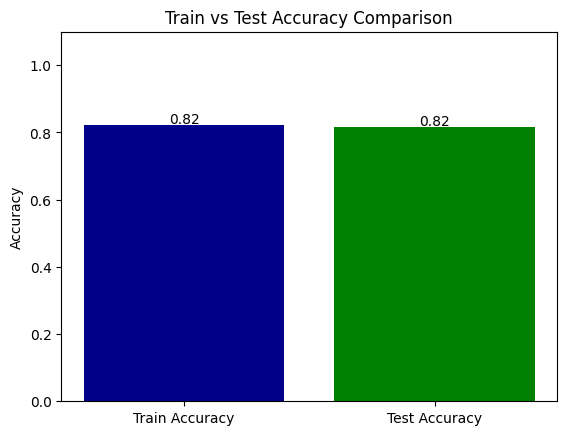

In [ ]:
# Bar chart
plt.bar(["Train Accuracy", "Test Accuracy"],
        [train_accuracy, test_accuracy],
        color=["darkblue", "green"])

# Add values on top of bars
plt.text(0, train_accuracy + 0.005, f"{train_accuracy:.2f}", ha='center')
plt.text(1, test_accuracy + 0.005, f"{test_accuracy:.2f}", ha='center')

# Labels
plt.ylim(0, 1.1)
plt.ylabel("Accuracy")
plt.title("Train vs Test Accuracy Comparison")
plt.show()

confusion and classification

In [ ]:
print('confusion metrics:', confusion_matrix(X_test_prediction, Y_test))
print('classification_report:', classification_report(X_test_prediction, Y_test))

confusion metrics: [[99 36]
 [ 0 62]]
classification_report:               precision    recall  f1-score   support

           0       1.00      0.73      0.85       135
           1       0.63      1.00      0.78        62

    accuracy                           0.82       197
   macro avg       0.82      0.87      0.81       197
weighted avg       0.88      0.82      0.82       197



In [ ]:
# Get predictions
Y_pred = model.predict(X_test_scaled)

# Create confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[99  0]
 [36 62]]


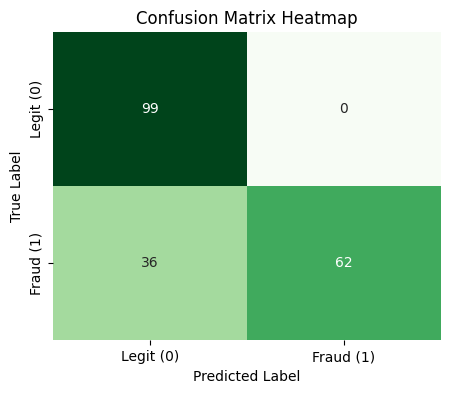

In [ ]:
# Plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Legit (0)', 'Fraud (1)'],
            yticklabels=['Legit (0)', 'Fraud (1)'])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heatmap")
plt.show()

AUC AND ROC

In [ ]:
print(type(model)) #checking if model supports probability
print(hasattr(model, "predict_proba"))

<class 'sklearn.linear_model._logistic.LogisticRegression'>
True


In [ ]:
print("X_test shape:", X_test_scaled.shape)


X_test shape: (197, 30)


In [ ]:
y_prob = model.predict_proba(X_test_scaled)[:, 1]


precision recall and f1 score


In [ ]:
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f" Best Threshold: {best_threshold:.3f} | Best F1: {f1_scores[best_idx]:.3f}")



 Best Threshold: 0.028 | Best F1: 0.903


In [ ]:
y_pred_final = (y_prob >= best_threshold).astype(int)

In [ ]:
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred_final))
print("\nClassification Report:\n", classification_report(Y_test, y_pred_final, digits=3))


Confusion Matrix:
 [[90  9]
 [10 88]]

Classification Report:
               precision    recall  f1-score   support

           0      0.900     0.909     0.905        99
           1      0.907     0.898     0.903        98

    accuracy                          0.904       197
   macro avg      0.904     0.904     0.904       197
weighted avg      0.904     0.904     0.904       197



AUC score

In [ ]:
auc = roc_auc_score(Y_test, y_prob)
print("AUC score:",auc)

AUC score: 0.9514533085961657


ROC curve

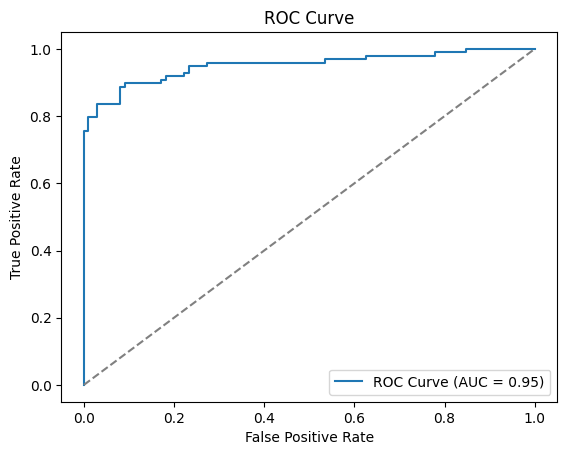

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve (AUC = %0.2f)" % auc)
plt.plot([0,1], [0,1], linestyle='--', color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

ROC curve and AUC score on Training data


In [ ]:
y_prob_train = model.predict_proba(X_train_scaled )[:, 1]

In [ ]:
train_auc = roc_auc_score(Y_train, y_prob_train)
print("Train AUC:", train_auc)

Train AUC: 0.9667661228865554


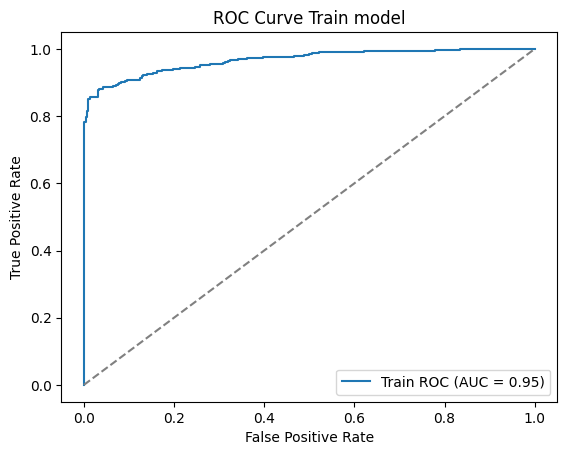

In [ ]:
fpr_train, tpr_train, thresholds = roc_curve(Y_train, y_prob_train)
plt.plot(fpr_train, tpr_train, label="Train ROC (AUC = %0.2f)" % auc)

plt.plot([0,1], [0,1], linestyle='--', color='gray')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Train model")
plt.legend()
plt.show()

TRAIN V/S TEST


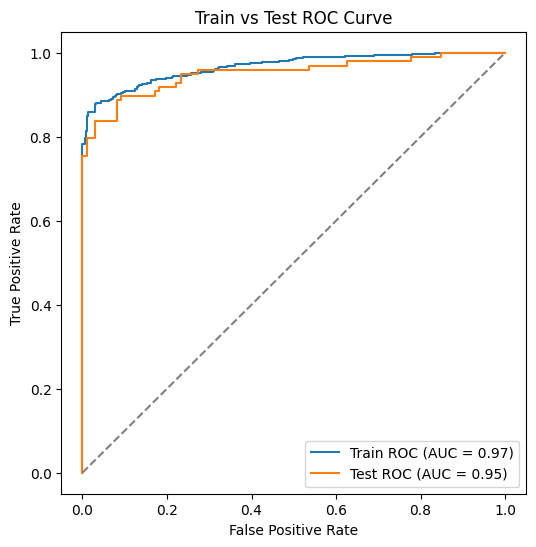

In [ ]:
plt.figure(figsize=(6,6))

# Plot Train
plt.plot(fpr_train, tpr_train, label="Train ROC (AUC = %0.2f)" % train_auc)

# Plot Test
plt.plot(fpr, tpr, label="Test ROC (AUC = %0.2f)" % auc)

# Baseline
plt.plot([0,1], [0,1], linestyle='--', color='gray')

# Labels and Title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train vs Test ROC Curve")
plt.legend()
plt.show()


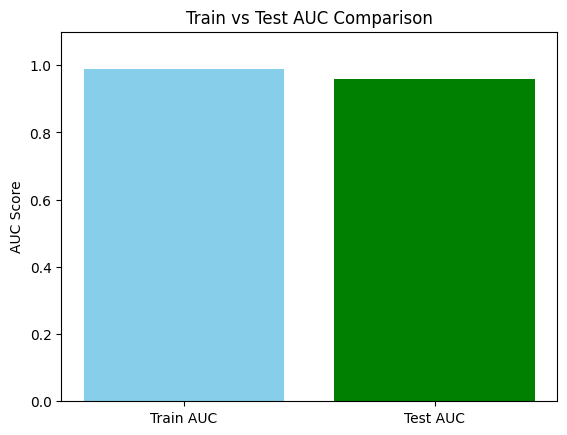

In [ ]:
train_auc = 0.99   # replace with your actual value
test_auc = 0.96    # replace with your actual value

plt.bar(["Train AUC", "Test AUC"], [train_auc, test_auc], color=['skyblue','green'])
plt.ylim(0, 1.1)
plt.title("Train vs Test AUC Comparison")
plt.ylabel("AUC Score")
plt.show()

In [ ]:
cv_scores = cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc')


NameError: name 'cross_val_score' is not defined

In [ ]:
print("Cross-validation AUC scores:", cv_scores)

In [ ]:
print("Mean CV AUC:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))

In [ ]:
# Example cv_scores from earlier
# cv_scores = cross_val_score(model, X_train, Y_train, cv=skf, scoring='roc_auc')
plt.bar(range(1, len(cv_scores)+1), cv_scores, color='skyblue')
plt.axhline(np.mean(cv_scores), color='red', linestyle='--', label=f"Mean AUC = {np.mean(cv_scores):.2f}")

plt.xlabel("Fold")
plt.ylabel("AUC Score")
plt.title("AUC Scores Across 5 Folds")
plt.legend()
plt.show()

In [ ]:
import pickle # Import the pickle module

# Save feature names and any preprocessing info
# Manually specify the feature names (common for Kaggle credit card dataset)
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

feature_info = {
    'feature_order': feature_names,
    'feature_names': feature_names,
    'categorical_features': [],
    'numerical_features': ['Amount', 'Time']
}
with open('feature_info.pkl', 'wb') as file:
    pickle.dump(feature_info, file)

In [ ]:
# Also save as a dictionary for programmatic access
model_info = {
    'model_type': 'LogisticRegression',
    'model_params': {
        'solver': 'liblinear',
        'max_iter': 1000,
        'random_state': None
    },
    'training_date': datetime.now().isoformat(),
    'dataset_info': {
        'original_size': len(credit_card_data),
        'original_legit': len(legit),
        'original_fraud': len(fraud),
        'undersampled_size': len(new_dataset),
        'train_size': len(X_train),
        'test_size': len(X_test)
    },
    'performance_metrics': {
        'train_accuracy': float(training_data_accuracy),
        'test_accuracy': float(test_data_accuracy),
        'train_auc': float(train_auc),
        'test_auc': float(auc),
        'cv_scores': [float(score) for score in cv_scores],
        'cv_mean': float(np.mean(cv_scores)),
        'cv_std': float(np.std(cv_scores))
    },
    'feature_info': feature_info,
    'preprocessing': {
        'scaler_type': 'StandardScaler',
        'features_used': feature_names
    }
}

with open(model_save_path + "model_info.pkl", "wb") as f:
    pickle.dump(model_info, f)

print("Model info dictionary saved!")


SAVING FILES

In [ ]:
# Save training and test sets
np.save(model_save_path + "X_train.npy", X_train)
np.save(model_save_path + "X_test.npy", X_test)
np.save(model_save_path + "Y_train.npy", Y_train)
np.save(model_save_path + "Y_test.npy", Y_test)
print("Training and test sets saved!")

In [ ]:
# Save feature names and any preprocessing info
# Manually specify the feature names (common for Kaggle credit card dataset)
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

feature_info = {
    'feature_order': feature_names,
    'feature_names': feature_names,
    'categorical_features': [],
    'numerical_features': ['Amount', 'Time']
}
with open('feature_info.pkl', 'wb') as file:
    pickle.dump(feature_info, file)

In [ ]:
try:
    print("Model variable exists:", type(model).__name__)
except NameError:
    print("No variable named 'model'")


In [ ]:
import joblib
import pickle

# Save trained model and scaler to Google Drive
joblib.dump(model, model_save_path + "fraud_model.pkl")
joblib.dump(scaler, model_save_path + "scaler.pkl")
print("Model and scaler saved successfully!")

In [ ]:
import joblib
import pickle

# Save trained model (not LogisticRegression class)
joblib.dump(model, "fraud_model.pkl")

# Save scaler if you used one
try:
    joblib.dump(scaler, "scaler.pkl")
except NameError:
    print("No scaler used, skipping.")

# Save feature info dictionary
feature_names = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
                 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
feature_info = {
    'feature_order': feature_names,
    'feature_names': feature_names,
    'categorical_features': [],
    'numerical_features': ['Amount', 'Time']  # adjust if needed
}
with open(model_save_path + 'feature_info.pkl', 'wb') as file:
    pickle.dump(feature_info, file)


In [ ]:
#  Download files to local machine for Streamlit app
from google.colab import files
files.download(model_save_path + "fraud_model.pkl")
files.download(model_save_path + "scaler.pkl")
files.download(model_save_path + "feature_info.pkl")
files.download(model_save_path + "performance_summary.png")

In [ ]:
import pandas as pd

# Load dataset
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fraud_detection/creditcard.csv')

# Get one legit and one fraud transaction
legit_sample = credit_card_data[credit_card_data['Class'] == 0].sample(n=1, random_state=42)
fraud_sample = credit_card_data[credit_card_data['Class'] == 1].sample(n=1, random_state=42)

print("Legit Transaction:\n", legit_sample)
print("\nFraud Transaction:\n", fraud_sample)


In [ ]:
import pandas as pd
import joblib

# Load your saved model & scaler
model = joblib.load("fraud_model.pkl")
scaler = joblib.load("scaler.pkl")  # if you used one

# Load the test CSV
test_data = pd.read_csv("fraud_test_dataset_v28.csv")

# Ensure same column order
feature_columns = [col for col in test_data.columns if col not in ["Class"]]
X_test = test_data[feature_columns]

# Apply scaling if used during training
X_test_scaled = scaler.transform(X_test)

# Predict
y_pred = model.predict(X_test_scaled)
print("Predictions:", y_pred)
print("Actual:", test_data["Class"].values)


In [ ]:
threshold = 0.45
y_pred_custom = (y_prob >= threshold).astype(int)
print("Custom threshold predictions:", y_pred_custom)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(Y_test, y_pred_custom))
print(classification_report(Y_test, y_pred_custom, digits=3))

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

best_threshold = 0.5
best_f1 = 0

for t in np.linspace(0.1, 0.9, 81):
    y_pred_temp = (y_prob >= t).astype(int)
    f1 = f1_score(Y_test, y_pred_temp)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best Threshold: {best_threshold:.3f}, Best F1: {best_f1:.3f}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Generate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, y_prob)

# Compute F1 scores for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)

# Find best threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Plot Precision, Recall, and F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.plot(thresholds, f1_scores[:-1], label='F1-Score', color='red')
plt.axvline(best_threshold, color='purple', linestyle='--', label=f'Best Threshold = {best_threshold:.3f}')
plt.title("Precision, Recall, and F1-Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Threshold: {best_threshold:.3f} (F1-Score = {best_f1:.3f})")


In [ ]:
chosen_threshold = 0.36  # best threshold from your curve
y_pred_final = (y_prob >= chosen_threshold).astype(int)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, y_pred_final))
print(classification_report(Y_test, y_pred_final, digits=3))


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, y_pred_final)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Threshold={chosen_threshold:.3f})')
plt.show()


In [ ]:
import joblib
joblib.dump(model, "final_fraud_model.pkl")
joblib.dump(scaler, "final_scaler.pkl")  # if you used a scaler


In [ ]:
import pandas as pd

# Load new test data
new_data = pd.read_csv("fraud_test_dataset_v28.csv")
X_new = new_data.drop("Class", axis=1)
X_new_scaled = scaler.transform(X_new)

y_new_prob = model.predict_proba(X_new_scaled)[:, 1]
y_new_pred = (y_new_prob >= chosen_threshold).astype(int)

print("Predictions on new data:", y_new_pred)
print("Actual:", new_data["Class"].values)


In [ ]:
adjusted_threshold = 0.36 # slightly lower than 0.487
y_new_pred_adjusted = (y_new_prob >= adjusted_threshold).astype(int)

print("Adjusted Predictions:", y_new_pred_adjusted)
print("Actual:", new_data["Class"].values)


In [ ]:
# Print probabilities alongside actual values
prob_df = pd.DataFrame({
    "Probabilities": y_new_prob,
    "Predicted": y_new_pred,
    "Actual": new_data["Class"].values
})
print(prob_df)
